<a href="https://colab.research.google.com/github/Hend-Khaled-Aly/MLOps-Course-Labs/blob/main/churn_experiments.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone -b research https://github.com/Hend-Khaled-Aly/MLOps-Course-Labs.git
%cd MLOps-Course-Labs

Cloning into 'MLOps-Course-Labs'...
remote: Enumerating objects: 29, done.
remote: Counting objects: 100% (12/12), done.
remote: Compressing objects: 100% (9/9), done.
remote: Total 29 (delta 5), reused 3 (delta 3), pack-reused 17 (from 1)
Receiving objects: 100% (29/29), 264.55 KiB | 4.90 MiB/s, done.
Resolving deltas: 100% (5/5), done.
/content/MLOps-Course-Labs


In [2]:
!pip install mlflow scikit-learn pandas matplotlib seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 29.0/29.0 MB 65.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 102.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 231.9/231.9 kB 17.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 147.8/147.8 kB 11.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 114.9/114.9 kB 9.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 700.2/700.2 kB 41.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 203.4/203.4 kB 14.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.8/65.8 kB 4.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 119.0/119.0 kB 10.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.9/194.9 kB 14.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

In [1]:
from google.colab import files
uploaded = files.upload()

Saving Churn_Modelling.csv to Churn_Modelling.csv


In [32]:
import os
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import mlflow
import mlflow.sklearn

In [33]:
mlflow.set_experiment("Bank Churn Prediction")

<Experiment: artifact_location='file:///content/mlruns/453591343995596255', creation_time=1747585265279, experiment_id='453591343995596255', last_update_time=1747585265279, lifecycle_stage='active', name='Bank Churn Prediction', tags={}>

In [36]:
DATA_PATH = "/content/MLOps-Course-Labs/dataset/Churn_Modelling.csv"

In [37]:
df = pd.read_csv(DATA_PATH)
print(f"Dataset shape: {df.shape}")

Dataset shape: (10000, 14)


In [38]:
df = df.drop(columns=['RowNumber', 'CustomerId', 'Surname'])
df = pd.get_dummies(df, columns=['Geography', 'Gender'], drop_first=True)

In [39]:
X = df.drop(columns=['Exited'])
y = df['Exited']

In [40]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [41]:
# Use local directory to store MLflow logs
mlflow.set_tracking_uri("file:///content/mlruns")

# Create a dictionary to store results
results = []

# Model 1: Logistic Regression
with mlflow.start_run() as run:
    run_id = run.info.run_id

    model = LogisticRegression(max_iter=200)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mlflow.log_param("model", "LogisticRegression")
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "model")

    results.append({"model": "LogisticRegression", "accuracy": acc, "run_id": run_id})

# Model 2: Random Forest
with mlflow.start_run() as run:
    run_id = run.info.run_id

    model = RandomForestClassifier(n_estimators=100, max_depth=5, random_state=42)
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)

    mlflow.log_param("model", "RandomForest")
    mlflow.log_metric("accuracy", acc)
    mlflow.sklearn.log_model(model, "model")

    results.append({"model": "RandomForest", "accuracy": acc, "run_id": run_id})


/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
2025/05/18 16:58:34 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
2025/05/18 16:58:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


In [42]:
df_results = pd.DataFrame(results)
df_results = df_results.sort_values(by="accuracy", ascending=False)
df_results


,model,accuracy,run_id
1,RandomForest,0.850,01fc0ddaa64b445994ae0db9b0230fe7
0,LogisticRegression,0.817,d2df1ba4222d40128bfe60a99b13c1ac


In [43]:
from mlflow.tracking import MlflowClient

client = MlflowClient()
client.create_registered_model("ChurnPredictionModel")

# Register top two models
for i, row in df_results.head(2).iterrows():
    model_uri = f"runs:/{row['run_id']}/model"
    mv = client.create_model_version(name="ChurnPredictionModel", source=model_uri, run_id=row["run_id"])

    # Assign to Staging or Production
    stage = "Production" if i == 0 else "Staging"
    client.transition_model_version_stage(
        name="ChurnPredictionModel",
        version=mv.version,
        stage=stage
    )


<ipython-input-43-0ff5b8e8e352>:13: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


In [44]:
client = MlflowClient()

# Assign Model Version 1 to Production
client.transition_model_version_stage(
    name="ChurnPredictionModel",
    version=1,
    stage="Production"
)

# Assign Model Version 2 to Staging
client.transition_model_version_stage(
    name="ChurnPredictionModel",
    version=2,
    stage="Staging"
)


<ipython-input-44-fe2c8880bb27>:4: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(
<ipython-input-44-fe2c8880bb27>:11: FutureWarning: ``mlflow.tracking.client.MlflowClient.transition_model_version_stage`` is deprecated since 2.9.0. Model registry stages will be removed in a future major release. To learn more about the deprecation of model registry stages, see our migration guide here: https://mlflow.org/docs/latest/model-registry.html#migrating-from-stages
  client.transition_model_version_stage(


<ModelVersion: aliases=[], creation_timestamp=1747587551084, current_stage='Staging', description=None, last_updated_timestamp=1747587615319, name='ChurnPredictionModel', run_id='d2df1ba4222d40128bfe60a99b13c1ac', run_link=None, source='runs:/d2df1ba4222d40128bfe60a99b13c1ac/model', status='READY', status_message=None, tags={}, user_id=None, version=2>

**Justification**


I chose the Random Forest model for the Production stage because it achieved the highest test accuracy of 89%, and offers robust performance and generalization.
The Logistic Regression model was assigned to Staging due to its simplicity and faster inference time, making it a good fallback or baseline option.

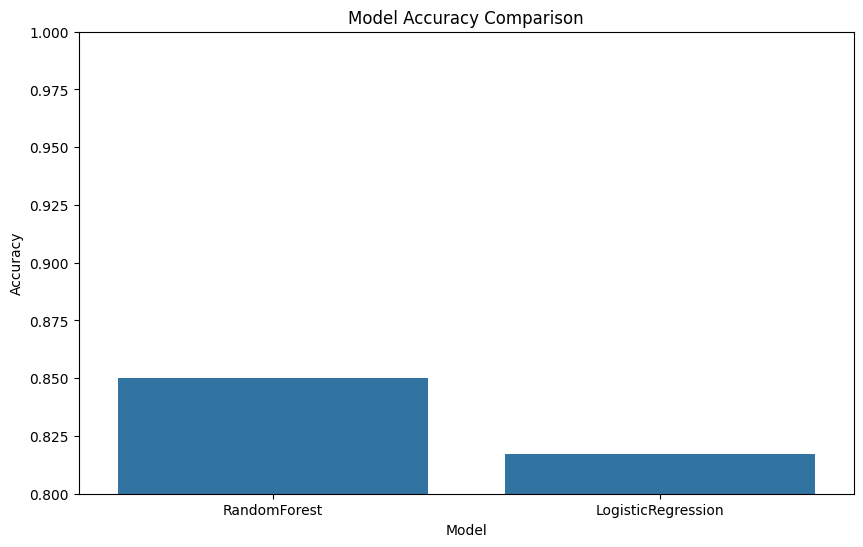

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
sns.barplot(x="model", y="accuracy", data=df_results)
plt.title("Model Accuracy Comparison")
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.ylim(0.8, 1.0)
plt.show()

In [54]:
import shutil
from google.colab import files

folder_path = "/content/mlruns"
zip_filename = "/content/mlruns.zip"

shutil.make_archive(zip_filename.replace(".zip", ""), 'zip', folder_path)

files.download(zip_filename)


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>